# Flight Delay Prediction

## Flight Data Pre-processing

- Exploring <strong>2016_1.csv</strong> flight Data to generalize
- Loading only the required columns
- Visualizing the missing data
- Removing the rows that have missing data in their columns
- Combining all the flight data after data handling into a df
- Storing the preprocessed data as a dataframe


In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import missingno as msno
%matplotlib inline


In [3]:
#importing the data
flight_2016 = pd.read_csv(r'D:\git_project\Flight-Delay-Prediction\Data\Flight\2016.csv')


In [4]:
airport_data = pd.read_csv(r'D:\git_project\Flight-Delay-Prediction\Data\Flight\airports.csv')

In [5]:
#to see all the columns of data frame
pd.set_option("display.max_columns", None)

In [6]:
#data overview
flight_2016.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,NaN,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,NaN,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,NaN,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN


### Visualizing Missing Data
- White lines indicate missing values
- There is an <strong>interesting trend</strong> in the columns that have missing values
- They mostly have missing values in common rows namely: 
    - <strong>DepTime, DepDelayMinutes and, DepDel15</strong>
    - <strong>ArrTime, ArrDelayMinutes and, ArrDel15</strong>

In [7]:
#Finding the null values present in different columns
flight_2016.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 63456
DEP_DELAY                63456
TAXI_OUT                 65418
WHEELS_OFF               65418
WHEELS_ON                67844
TAXI_IN                  67844
CRS_ARR_TIME                 0
ARR_TIME                 67844
ARR_DELAY                79513
CANCELLED                    0
CANCELLATION_CODE      5551797
DIVERTED                     0
CRS_ELAPSED_TIME             6
ACTUAL_ELAPSED_TIME      79513
AIR_TIME                 79513
DISTANCE                     0
CARRIER_DELAY          4653419
WEATHER_DELAY          4653419
NAS_DELAY              4653419
SECURITY_DELAY         4653419
LATE_AIRCRAFT_DELAY    4653419
Unnamed: 27            5617658
dtype: int64

In [8]:
columns_to_drop_flight_data = [
    'CANCELLATION_CODE','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 
    'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 27'
]
flight_2016= flight_2016.drop(columns=columns_to_drop_flight_data, errors='ignore')

In [9]:
# we can drop the OP_CARRIER_FL_NUM column as well
flight_2016.drop('OP_CARRIER_FL_NUM', axis = 1, inplace = True)

In [10]:
flight_2016.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,DL,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0
1,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,0.0,116.0,109.0,92.0,640.0
2,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0
3,2016-01-01,DL,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0
4,2016-01-01,DL,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,0.0,136.0,188.0,121.0,874.0


In [11]:
flight_2016.shape

(5617658, 20)

Axes(0.125,0.11;0.698618x0.77)


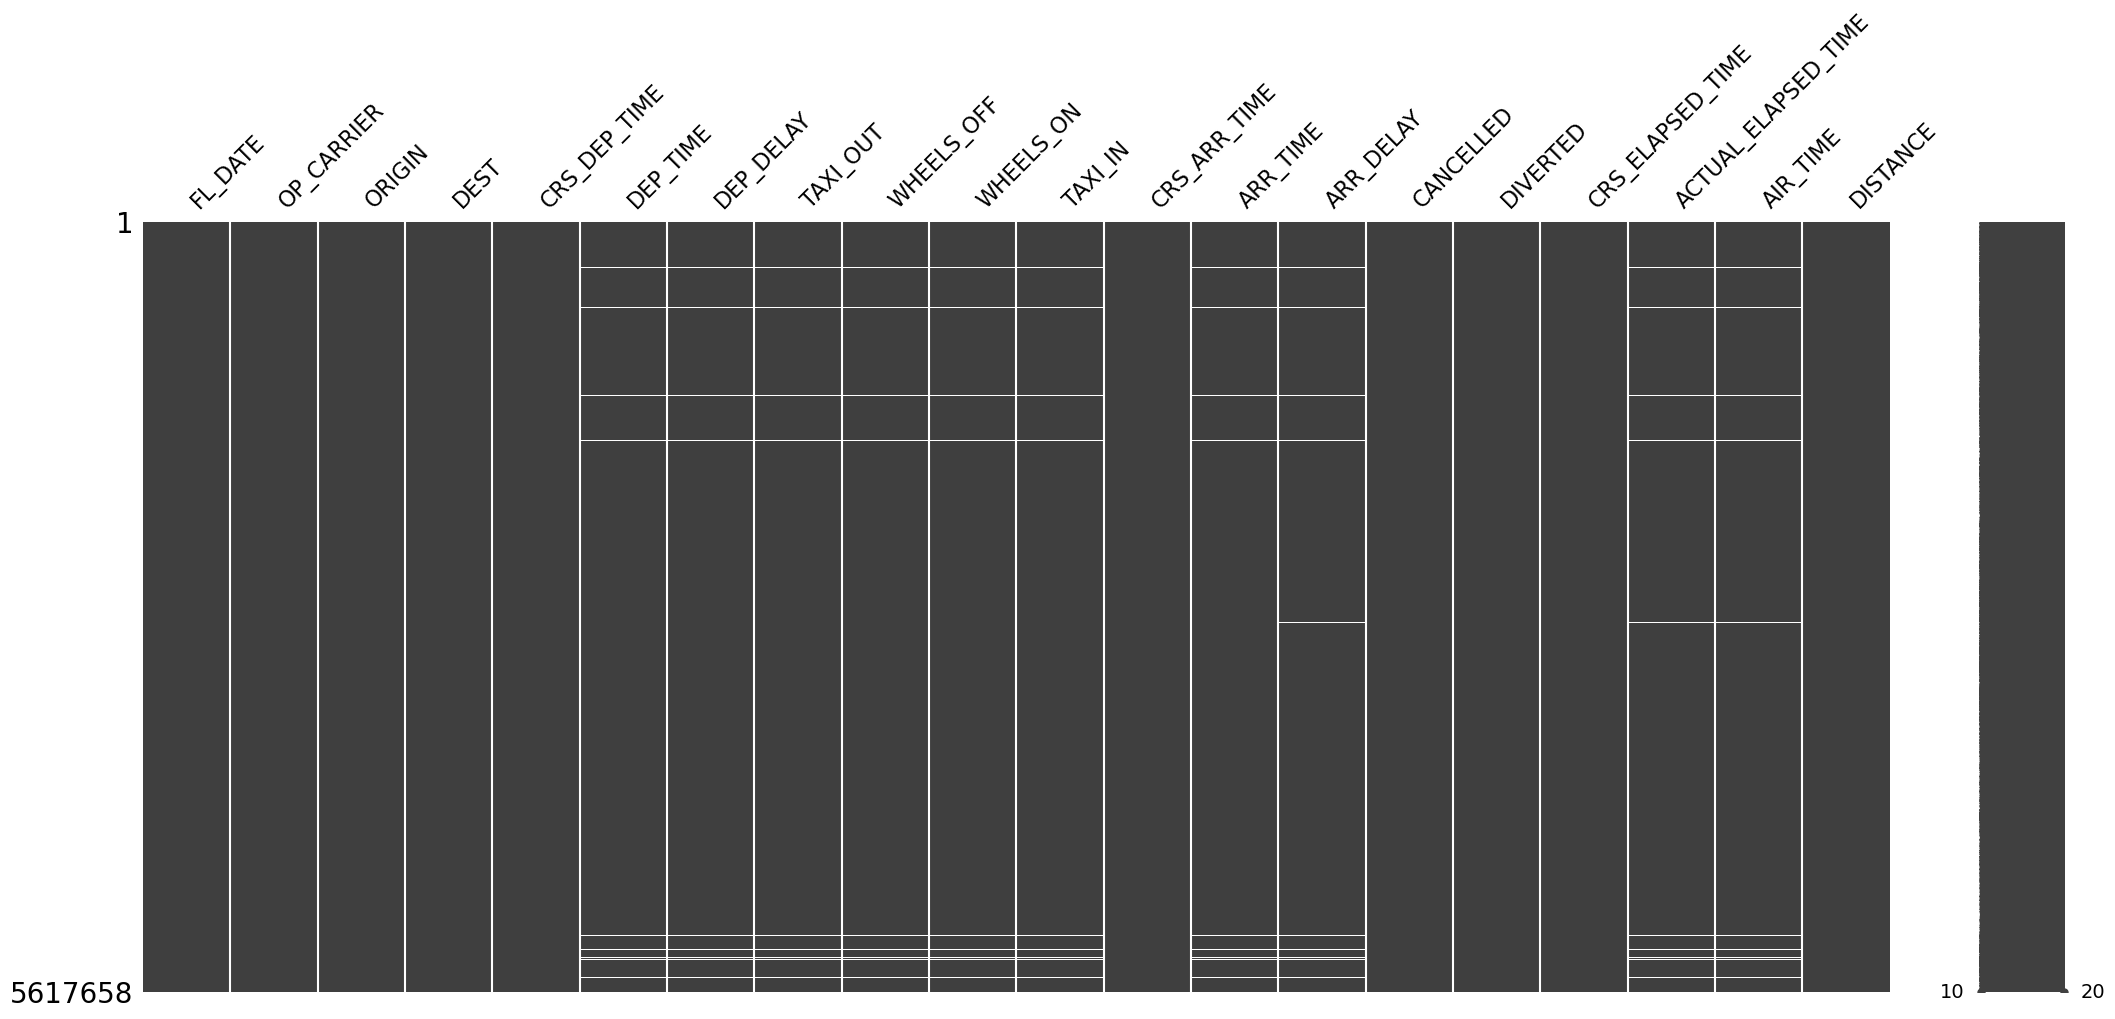

In [12]:
print(msno.matrix(flight_2016))

In [13]:
flight_2016 = flight_2016.dropna( axis=0)

In [14]:
flight_2016.shape

(5538145, 20)

In [15]:
flight_2016.isnull().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

In [16]:
flight_2016.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,DL,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0
1,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,0.0,116.0,109.0,92.0,640.0
2,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0
3,2016-01-01,DL,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0
4,2016-01-01,DL,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,0.0,136.0,188.0,121.0,874.0


* Data Dictionary

| Column Name | Description |
|---|---|
| FL_DATE | Date of the flight (YYYY-MM-DD) |
| OP_CARRIER | Operating Carrier |
| ORIGIN | Origin Airport Code |
| DEST | Destination Airport Code |
| CRS_DEP_TIME | Scheduled Departure Time (24-hour format) |
| DEP_TIME | Actual Departure Time (24-hour format) |
| DEP_DELAY | Departure Delay (minutes) |
| TAXI_OUT | Taxi Out Time (minutes) |
| WHEELS_OFF | Wheels Off Time (24-hour format) |
| WHEELS_ON | Wheels On Time (24-hour format) |
| TAXI_IN | Taxi In Time (minutes) |
| CRS_ARR_TIME | Scheduled Arrival Time (24-hour format) |
| ARR_TIME | Actual Arrival Time (24-hour format) |
| ARR_DELAY | Arrival Delay (minutes) |
| CANCELLED | Cancelled (0 - Not Cancelled, 1 - Cancelled) |
| DIVERTED | Diverted (0 - Not Diverted, 1 - Diverted) |
| CRS_ELAPSED_TIME | Scheduled Elapsed Time (minutes) |
| ACTUAL_ELAPSED_TIME | Actual Elapsed Time (minutes) |
| AIR_TIME | Air Time (minutes) |
| DISTANCE | Distance (miles) |

In [17]:
flight_2016['FL_DATE'] = pd.to_datetime(flight_2016['FL_DATE'])

In [18]:
flight_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538145 entries, 0 to 5617657
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         int64         
 5   DEP_TIME             float64       
 6   DEP_DELAY            float64       
 7   TAXI_OUT             float64       
 8   WHEELS_OFF           float64       
 9   WHEELS_ON            float64       
 10  TAXI_IN              float64       
 11  CRS_ARR_TIME         int64         
 12  ARR_TIME             float64       
 13  ARR_DELAY            float64       
 14  CANCELLED            float64       
 15  DIVERTED             float64       
 16  CRS_ELAPSED_TIME     float64       
 17  ACTUAL_ELAPSED_TIME  float64       
 18  AIR_TIME             float64       
 19  DISTANCE             

In [19]:
flight_df = flight_2016.copy()

In [20]:
#overview
flight_df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,DL,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0
1,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,0.0,116.0,109.0,92.0,640.0
2,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0
3,2016-01-01,DL,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0
4,2016-01-01,DL,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,0.0,136.0,188.0,121.0,874.0


In [21]:
#different  op_carrier
flight_df['OP_CARRIER'].unique()

array(['DL', 'AS', 'EV', 'F9', 'WN', 'OO', 'HA', 'NK', 'UA', 'VX', 'AA',
       'B6'], dtype=object)

In [22]:
#updating the airlines names

flight_df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'HA':'Hawaiian Airlines',
    'NK':'Spirit Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [23]:
flight_df['OP_CARRIER'].nunique()

12

In [24]:
flight_df['OP_CARRIER'].value_counts()

Southwest Airlines    1280514
Delta Airlines         916896
American Airlines      901412
SkyWest Airlines       595578
United Airlines        538190
ExpressJet             477524
JetBlue Airways        278011
Alaska Airlines        176013
Spirit Airlines        135371
Frontier Airlines       93792
Hawaiian Airlines       76587
Virgin America          68257
Name: OP_CARRIER, dtype: int64

In [25]:
#different numbers of flights 
flight_df['CANCELLED'].value_counts()

0.0    5538145
Name: CANCELLED, dtype: int64

- We don't have any flights which are cancelled.

In [26]:
airport_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


We can make use of IATA_CODE  to get the full name of airports and we can replace it in the filght data.

In [27]:
#different IATA_CODE's
airport_data['IATA_CODE'].unique()

array(['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY',
       'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC',
       'APN', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL',
       'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BLI',
       'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO',
       'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE',
       'CAK', 'CDC', 'CDV', 'CEC', 'CHA', 'CHO', 'CHS', 'CID', 'CIU',
       'CLD', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'CNY', 'COD',
       'COS', 'COU', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB',
       'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DFW', 'DHN', 'DIK', 'DLG',
       'DLH', 'DRO', 'DSM', 'DTW', 'DVL', 'EAU', 'ECP', 'EGE', 'EKO',
       'ELM', 'ELP', 'ERI', 'ESC', 'EUG', 'EVV', 'EWN', 'EWR', 'EYW',
       'FAI', 'FAR', 'FAT', 'FAY', 'FCA', 'FLG', 'FLL', 'FNT', 'FSD',
       'FSM', 'FWA', 'GCC', 'GCK', 'GEG', 'GFK', 'GGG', 'GJT', 'GNV',
       'GPT', 'GRB',

In [28]:
#Count of different IATA_CODE 
airport_data['IATA_CODE'].nunique()

322

In [29]:
flight_df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,Delta Airlines,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0
1,2016-01-01,Delta Airlines,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,0.0,116.0,109.0,92.0,640.0
2,2016-01-01,Delta Airlines,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0
3,2016-01-01,Delta Airlines,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0
4,2016-01-01,Delta Airlines,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,0.0,136.0,188.0,121.0,874.0


In [30]:
# Count different Origin airport
flight_df['ORIGIN'].nunique()

311

In [31]:
# Count different Dest airport
flight_df['DEST'].nunique()

310

In [32]:
#airport not peresent in  DEST
origin_set = set(flight_df['ORIGIN'].unique())
dest_set = set(flight_df['DEST'].unique())
diff_set = origin_set - dest_set
print(diff_set ," is not present in the destination airport")

{'EFD'}  is not present in the destination airport


In [33]:
#airport which is not present in the flight data
airport_set = set(airport_data['IATA_CODE'].unique())
flight_air_set  = origin_set.intersection(dest_set)
common_airport = airport_set.intersection(flight_air_set)
missing_airport = flight_air_set - common_airport
print(missing_airport)
print(len(missing_airport))

{'SPN', 'PGD'}
2


* PGD & SPN airports are not available in airport data
* so we can remove the data of these airports from the flight dataframe

In [34]:
flight_df[(flight_df['ORIGIN'] == 'PGD') | (flight_df['ORIGIN'] == 'SPN')|
            (flight_df['DEST'] == 'PGD') | (flight_df['DEST'] == 'SPN')]

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
4483035,2016-10-17,United Airlines,SPN,GUM,1725,1749.0,24.0,5.0,1754.0,1817.0,3.0,1805,1820.0,15.0,0.0,0.0,40.0,31.0,23.0,129.0
4547786,2016-10-21,United Airlines,GUM,SPN,630,629.0,-1.0,9.0,638.0,702.0,5.0,710,707.0,-3.0,0.0,0.0,40.0,38.0,24.0,129.0
4683481,2016-10-30,Frontier Airlines,PHL,PGD,1620,1614.0,-6.0,17.0,1631.0,1849.0,14.0,1916,1903.0,-13.0,0.0,0.0,176.0,169.0,138.0,973.0
4683482,2016-10-30,Frontier Airlines,PGD,PHL,2010,2016.0,6.0,10.0,2026.0,2234.0,7.0,2248,2241.0,-7.0,0.0,0.0,158.0,145.0,128.0,973.0
4705722,2016-10-31,Frontier Airlines,TTN,PGD,600,548.0,-12.0,15.0,603.0,820.0,9.0,906,829.0,-37.0,0.0,0.0,186.0,161.0,137.0,1008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579474,2016-12-29,Frontier Airlines,PGD,PHL,2013,2010.0,-3.0,8.0,2018.0,2226.0,5.0,2244,2231.0,-13.0,0.0,0.0,151.0,141.0,128.0,973.0
5599554,2016-12-30,Frontier Airlines,TTN,PGD,600,614.0,14.0,13.0,627.0,857.0,8.0,915,905.0,-10.0,0.0,0.0,195.0,171.0,150.0,1008.0
5599555,2016-12-30,Frontier Airlines,PGD,TTN,1000,948.0,-12.0,9.0,957.0,1217.0,6.0,1239,1223.0,-16.0,0.0,0.0,159.0,155.0,140.0,1008.0
5612761,2016-12-31,Frontier Airlines,TTN,PGD,600,607.0,7.0,10.0,617.0,847.0,6.0,915,853.0,-22.0,0.0,0.0,195.0,166.0,150.0,1008.0


In [35]:
flight_df.shape

(5538145, 20)

In [36]:
flight_df = flight_df[~((flight_df['ORIGIN'] == 'PGD') | (flight_df['ORIGIN'] == 'SPN')|
            (flight_df['DEST'] == 'PGD') | (flight_df['DEST'] == 'SPN'))]

In [37]:
flight_df.shape

(5537988, 20)

In [38]:
airport_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [39]:
airport_dict = pd.Series(airport_data.CITY.values,index = airport_data.IATA_CODE).to_dict()

In [40]:
airport_dict

{'ABE': 'Allentown',
 'ABI': 'Abilene',
 'ABQ': 'Albuquerque',
 'ABR': 'Aberdeen',
 'ABY': 'Albany',
 'ACK': 'Nantucket',
 'ACT': 'Waco',
 'ACV': 'Arcata/Eureka',
 'ACY': 'Atlantic City',
 'ADK': 'Adak',
 'ADQ': 'Kodiak',
 'AEX': 'Alexandria',
 'AGS': 'Augusta',
 'AKN': 'King Salmon',
 'ALB': 'Albany',
 'ALO': 'Waterloo',
 'AMA': 'Amarillo',
 'ANC': 'Anchorage',
 'APN': 'Alpena',
 'ASE': 'Aspen',
 'ATL': 'Atlanta',
 'ATW': 'Appleton',
 'AUS': 'Austin',
 'AVL': 'Asheville',
 'AVP': 'Wilkes-Barre/Scranton',
 'AZO': 'Kalamazoo',
 'BDL': 'Windsor Locks',
 'BET': 'Bethel',
 'BFL': 'Bakersfield',
 'BGM': 'Binghamton',
 'BGR': 'Bangor',
 'BHM': 'Birmingham',
 'BIL': 'Billings',
 'BIS': 'Bismarck',
 'BJI': 'Bemidji',
 'BLI': 'Bellingham',
 'BMI': 'Bloomington',
 'BNA': 'Nashville',
 'BOI': 'Boise',
 'BOS': 'Boston',
 'BPT': 'Beaumont/Port Arthur',
 'BQK': 'Brunswick',
 'BQN': 'Aguadilla',
 'BRD': 'Brainerd',
 'BRO': 'Brownsville',
 'BRW': 'Barrow',
 'BTM': 'Butte',
 'BTR': 'Baton Rouge',
 'BTV

In [41]:
flight_df['ORIGIN'].replace(airport_dict, inplace=True)
flight_df['DEST'].replace(airport_dict, inplace=True)

In [44]:
flight_df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,0.0,116.0,109.0,92.0,640.0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,0.0,136.0,188.0,121.0,874.0


In [46]:
flight_df1 = flight_df.copy()

In [48]:
# we can drop the arrival time and depature time column as the relevant information is shown by delay
flight_df1.drop(columns = ['DEP_TIME', 'ARR_TIME'], inplace = True)

In [49]:
flight_df1.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,1935,0.0,23.0,1958.0,2107.0,13.0,2144,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,2125,5.0,13.0,2143.0,2315.0,4.0,2321,-2.0,0.0,0.0,116.0,109.0,92.0,640.0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,2255,1.0,19.0,2315.0,542.0,5.0,600,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,1656,4.0,12.0,1712.0,2205.0,8.0,2229,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,900,72.0,63.0,1115.0,1416.0,4.0,1216,124.0,0.0,0.0,136.0,188.0,121.0,874.0


In [50]:
#exporting the dataframe to csv
flight_df1.to_csv('flight_df.csv')

In [52]:
df1 = pd.read_csv(r'D:\git_project\Flight-Delay-Prediction\flight_df.csv')

In [53]:
# For handling the date column
# CRS DEP TIME  & #CRS ARR TIME
# We can convert this to hrs basis

df1['CRS_DEP_TIME'] = np.ceil(df1['CRS_DEP_TIME']/100).apply(int)
df1['WHEELS_OFF'] = np.ceil(df1['WHEELS_OFF']/600).apply(int) 
df1['WHEELS_ON'] = np.ceil(df1['WHEELS_ON']/600).apply(int)
df1['CRS_ARR_TIME'] = np.ceil(df1['CRS_ARR_TIME']/100).apply(int)


In [54]:
df1.head()

,Unnamed: 0,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0.0,23.0,4,4,13.0,22,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0
1,1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5.0,13.0,4,4,4.0,24,-2.0,0.0,0.0,116.0,109.0,92.0,640.0
2,2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1.0,19.0,4,1,5.0,6,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0
3,3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4.0,12.0,3,4,8.0,23,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0
4,4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72.0,63.0,2,3,4.0,13,124.0,0.0,0.0,136.0,188.0,121.0,874.0


In [57]:
#removing the unnamed :0
df1 = df1.iloc[:,1:]

In [58]:
df1.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0.0,23.0,4,4,13.0,22,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5.0,13.0,4,4,4.0,24,-2.0,0.0,0.0,116.0,109.0,92.0,640.0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1.0,19.0,4,1,5.0,6,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4.0,12.0,3,4,8.0,23,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72.0,63.0,2,3,4.0,13,124.0,0.0,0.0,136.0,188.0,121.0,874.0


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537988 entries, 0 to 5537987
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   ORIGIN               object 
 3   DEST                 object 
 4   CRS_DEP_TIME         int64  
 5   DEP_DELAY            float64
 6   TAXI_OUT             float64
 7   WHEELS_OFF           int64  
 8   WHEELS_ON            int64  
 9   TAXI_IN              float64
 10  CRS_ARR_TIME         int64  
 11  ARR_DELAY            float64
 12  CANCELLED            float64
 13  DIVERTED             float64
 14  CRS_ELAPSED_TIME     float64
 15  ACTUAL_ELAPSED_TIME  float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
dtypes: float64(10), int64(4), object(4)
memory usage: 760.5+ MB


In [60]:
df1['DAY'] = pd.DatetimeIndex(df1['FL_DATE']).day
df1['MONTH'] = pd.DatetimeIndex(df1['FL_DATE']).month

In [61]:
df1.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0.0,23.0,4,4,13.0,22,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0,1,1
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5.0,13.0,4,4,4.0,24,-2.0,0.0,0.0,116.0,109.0,92.0,640.0,1,1
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1.0,19.0,4,1,5.0,6,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0,1,1
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4.0,12.0,3,4,8.0,23,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0,1,1
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72.0,63.0,2,3,4.0,13,124.0,0.0,0.0,136.0,188.0,121.0,874.0,1,1


In [62]:
import calendar
df1['MONTH_AB'] = df1['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [63]:
print('Maximum number of days in a month:', df1.DAY.nunique())
print('Total number of months:', df1.MONTH.nunique())

Maximum number of days in a month: 31
Total number of months: 12


In [64]:
print('Months present in dataframe:', df1.MONTH.unique())
print('Months present in dataframe:', df1.MONTH_AB.unique())

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


In [66]:
#Binary Classication
status = []

for value in df1['ARR_DELAY']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df1['FLIGHT_STATUS'] = status
   

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0.0,23.0,4,4,13.0,22,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0,1,1,Jan,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5.0,13.0,4,4,4.0,24,-2.0,0.0,0.0,116.0,109.0,92.0,640.0,1,1,Jan,0


In [67]:
#percentage of flight which are delayed
df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.638749
1    0.361251
Name: FLIGHT_STATUS, dtype: float64

In [69]:
df1.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0.0,23.0,4,4,13.0,22,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0,1,1,Jan,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5.0,13.0,4,4,4.0,24,-2.0,0.0,0.0,116.0,109.0,92.0,640.0,1,1,Jan,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1.0,19.0,4,1,5.0,6,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0,1,1,Jan,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4.0,12.0,3,4,8.0,23,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0,1,1,Jan,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72.0,63.0,2,3,4.0,13,124.0,0.0,0.0,136.0,188.0,121.0,874.0,1,1,Jan,1


In [68]:
df1.to_csv('flight_df1.csv')